In [117]:
#!pip install -U scikit-learn seaborn

In [2]:
import sklearn
from sklearn import preprocessing
import numpy as np

In [3]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [120]:
df.OnlineSecurity.value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [121]:
le = preprocessing.LabelEncoder()
l = ["PaperlessBilling", "gender", "Partner", "StreamingMovies", "OnlineSecurity", "InternetService", "SeniorCitizen", "Contract","TechSupport", "Churn"]
for k in l:
    df[k] = le.fit_transform(df[k])


In [122]:
df["OnlineSecurity1"] = 0
df["OnlineSecurity1"] = np.where(df.OnlineSecurity==2, 1, 0)
df.OnlineSecurity1.value_counts()

OnlineSecurity1
0    5024
1    2019
Name: count, dtype: int64

In [123]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineSecurity1
0,7590-VHVEG,0,0,1,No,1,No,No phone service,0,0,...,0,No,0,0,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,1,0,0,No,34,Yes,No,0,2,...,0,No,0,1,0,Mailed check,56.95,1889.5,0,1
2,3668-QPYBK,1,0,0,No,2,Yes,No,0,2,...,0,No,0,0,1,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,1,0,0,No,45,No,No phone service,0,2,...,2,No,0,1,0,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,0,0,0,No,2,Yes,No,1,0,...,0,No,0,0,1,Electronic check,70.70,151.65,1,0


In [124]:
df['TotalCharges'].str.replace('.', ',')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df = df[df['TotalCharges'].notna()]

In [125]:
# encode Total Charges as binary treatment
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [126]:
df["HighCharges"] = 0
df.HighCharges = df.TotalCharges.apply(lambda x: 0 if x <= 5800 else 1)
df.HighCharges.value_counts()

HighCharges
0    6250
1     782
Name: count, dtype: int64

# Correlational AI model

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
feature_cols = ["PaperlessBilling","gender","Partner","Contract","StreamingMovies", "InternetService","OnlineSecurity1", "SeniorCitizen","TechSupport"]

In [129]:
X = df[feature_cols] # Features
y = df.Churn # Target variable

In [130]:
import statsmodels.api as sm
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7022
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3209.8
Date:                Fri, 08 Mar 2024   Deviance:                       6419.6
Time:                        17:57:36   Pearson chi2:                 7.51e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2174
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4747      0.087     -5.479      0.000      -0.644      -0.305
PaperlessBilling     0.6133      0.067      9.103      0.000       0.481       0.745
gender              -0.0492      0.061     -0.805      0.421      -0.169       0.071
Partner             -0.2319      0.064     -3.606      0.000      -0.358      -0.106
Contract            -1.3955      0.066    -21.304      0.000      -1.524      -1.267
StreamingMovies      0.1637      0.035      4.704      0.000       0.096       0.232
InternetService     -0.1053      0.049     -2.148      0.032      -0.201      -0.009
OnlineSecurity1     -0.5216      0.081     -6.422      0.000      -0.681      -0.362
SeniorCitizen        0.3824      0.077      4.977      0.000       0.232       0.533
TechSupport         -0.3797      0.041     -9.260      0.000      -0.460      -0.299
====================================================================================
"""

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [132]:
model = LogisticRegression(random_state=16)
model.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [133]:
print(model.coef_)

[[ 0.57697253 -0.0883417  -0.26180052 -1.37025111  0.16553758 -0.13451986
  -0.51301599  0.33811369 -0.38661598]]


In [134]:
y_pred = model.predict(X_test)

In [135]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1137,  145],
       [ 264,  212]])

Text(0.5, 427.9555555555555, 'Predicted label')

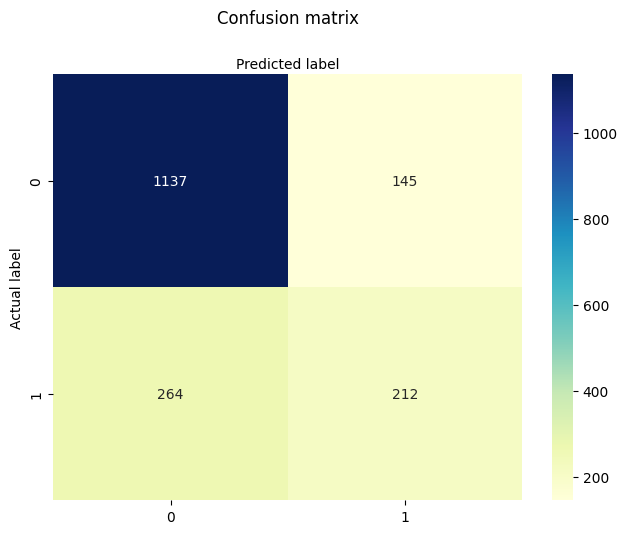

In [136]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [137]:
from sklearn.metrics import classification_report
target_names = ['no_churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no_churn       0.81      0.89      0.85      1282
       churn       0.59      0.45      0.51       476

    accuracy                           0.77      1758
   macro avg       0.70      0.67      0.68      1758
weighted avg       0.75      0.77      0.76      1758



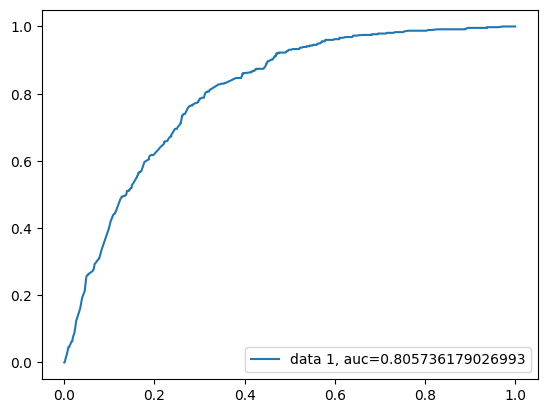

In [138]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# CausalAI model

In [6]:
import dowhy
from dowhy import CausalModel

In [7]:
# I. Create a causal model from the data and given graph.
causal_graph = """
digraph {
Churn;
PaperlessBilling;
Contract;
StreamingMovies;
InternetService;
SeniorCitizen;
OnlineSecurity1;
TechSupport;
TechSupport -> Churn; PaperlessBilling -> Churn;
  Contract ->Churn;
Contract -> PaperlessBilling; 
StreamingMovies -> Contract; InternetService -> Contract; 
OnlineSecurity1->InternetService;
SeniorCitizen -> StreamingMovies; SeniorCitizen -> InternetService;SeniorCitizen -> TechSupport; SeniorCitizen->OnlineSecurity1;
}


"""

In [8]:
import sys
if sys.maxunicode == 0x10FFFF:
    print ('Python built with UCS4 (wide unicode) support')
else:
    print ('Python built with UCS2 (narrow unicode) support')


Python built with UCS4 (wide unicode) support


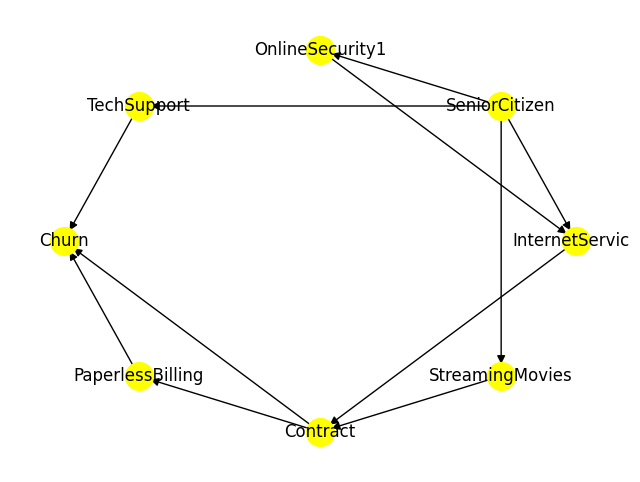

In [9]:
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='OnlineSecurity1',
        outcome='Churn')
model.view_model()
#from IPython.display import Image, display
#display(Image(filename="causal_model_1.png"))

In [143]:
# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                 
──────────────────(E[Churn|SeniorCitizen])
d[OnlineSecurity₁]                        
Estimand assumption 1, Unconfoundedness: If U→{OnlineSecurity1} and U→Churn then P(Churn|OnlineSecurity1,SeniorCitizen,U) = P(Churn|OnlineSecurity1,SeniorCitizen)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [144]:
# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                 
──────────────────(E[Churn|SeniorCitizen])
d[OnlineSecurity₁]                        
Estimand assumption 1, Unconfoundedness: If U→{OnlineSecurity1} and U→Churn then P(Churn|OnlineSecurity1,SeniorCitizen,U) = P(Churn|OnlineSecurity1,SeniorCitizen)

## Realized estimand
b: Churn~OnlineSecurity1+SeniorCitizen
Target units: ate

## Estimate
Mean value: -0.16345262770334829



In [145]:
# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")
print(refute_results)

Refute: Add a random common cause
Estimated effect:-0.16345262770334829
New effect:-0.16345262770334826
p value:1.0



In [146]:
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="data_subset_refuter")
print(refute_results)

Refute: Use a subset of data
Estimated effect:-0.16345262770334829
New effect:-0.16420472558001376
p value:0.9



In [147]:
refutel = model.refute_estimate(identified_estimand,estimate, "placebo_treatment_refuter")
print(refutel)

Refute: Use a Placebo Treatment
Estimated effect:-0.16345262770334829
New effect:0.004968401234061201
p value:0.54

